In [1]:
# import splitfolders 

# #### input dataset that want to split
# input_folder = 'DATASET_3'  

# output_folder= 'Splitted_Dataset_3'

# splitfolders.ratio(input_folder, output= output_folder, seed=1337, ratio = (0.9, 0.0, 0.1))

Copying files: 13342 files [01:33, 142.01 files/s]


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import glob
import numpy as np
import json

with open('model.json', 'r') as json_file:
        json_savedModel= json_file.read()

    
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('model.h5')

In [4]:
def get_datagen():    
    datagen = ImageDataGenerator(
        #rescale=1./255,
        rotation_range=16,
        width_shift_range=0.1,
        height_shift_range=0.1,
#         horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.1
    )
    test_datagen = ImageDataGenerator(
        #rescale=1./255,
    )
    return datagen,test_datagen


def get_data(train_datagen,test_datagen):
    train_it = train_datagen.flow_from_directory('Splitted_Dataset_3/train', class_mode='categorical',target_size=(224, 224))

    test_it = test_datagen.flow_from_directory('Splitted_Dataset_3/test', class_mode='categorical',target_size=(224, 224))
    return train_it,test_it

In [5]:
def get_model(vgg): 
    
    x = tf.keras.layers.Flatten()(vgg.output)
    # three hidden layers
    x = tf.keras.layers.Dense(256, activation='selu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    # final softmax layer with two categories (dog and cat)
    predictions = tf.keras.layers.Dense(52, activation='softmax')(x)
    model = tf.keras.Model(inputs=vgg.input,outputs=predictions)
    model.summary()
    return model


In [6]:
def get_Resnet():
    from tensorflow.keras.applications import InceptionV3
    vgg = InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='avg')
    for i in range(0,len(vgg.layers)-20):
        vgg.layers[i].trainable = False
    vgg.summary()
    return vgg

In [7]:
datagen,test_datagen=get_datagen()
train_it,test_it=get_data(datagen,test_datagen)

Found 11984 images belonging to 52 classes.
Found 1358 images belonging to 52 classes.


In [8]:
def train(ep):
    model = get_Resnet()
    model=get_model(model)
    model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adamax(),
                      metrics=['acc'])
    history = model.fit(train_it, epochs = ep,steps_per_epoch=16, validation_data=test_it, validation_steps=8)
    return model,history

In [10]:
model,history = train(100)

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

 Normalization)                                                                                   
                                                                                                  
 activation_102 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_102[0][0]']
                                                                                                  
 conv2d_100 (Conv2D)            (None, 25, 25, 48)   9216        ['max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_103 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_102[0][0]']         
                                                                                                  
 batch_normalization_100 (Batch  (None, 25, 25, 48)  144         ['conv2d_100[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_112 (Conv2D)            (None, 25, 25, 64)   16384       ['average_pooling2d_10[0][0]']   
                                                                                                  
 batch_normalization_106 (Batch  (None, 25, 25, 64)  192         ['conv2d_106[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_108 (Batch  (None, 25, 25, 64)  192         ['conv2d_108[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_111 (Batch  (None, 25, 25, 96)  288         ['conv2d_111[0][0]']             
 Normaliza

                                                                  'activation_119[0][0]']         
                                                                                                  
 conv2d_121 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed2[0][0]']                 
                                                                                                  
 batch_normalization_121 (Batch  (None, 25, 25, 64)  192         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_121 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_121[0][0]']
                                                                                                  
 conv2d_122 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_121[0][0]']         
          

 conv2d_127 (Conv2D)            (None, 12, 12, 192)  172032      ['activation_126[0][0]']         
                                                                                                  
 conv2d_132 (Conv2D)            (None, 12, 12, 192)  172032      ['activation_131[0][0]']         
                                                                                                  
 conv2d_133 (Conv2D)            (None, 12, 12, 192)  147456      ['average_pooling2d_12[0][0]']   
                                                                                                  
 batch_normalization_124 (Batch  (None, 12, 12, 192)  576        ['conv2d_124[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_127 (Batch  (None, 12, 12, 192)  576        ['conv2d_127[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_134 (Batch  (None, 12, 12, 192)  576        ['conv2d_134[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_137 (Batch  (None, 12, 12, 192)  576        ['conv2d_137[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_142 (Batch  (None, 12, 12, 192)  576        ['conv2d_142[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_152 (Batch  (None, 12, 12, 192)  576        ['conv2d_152[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_153 (Batch  (None, 12, 12, 192)  576        ['conv2d_153[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_144[0][0]']
                                                                                                  
 activatio

 batch_normalization_163 (Batch  (None, 12, 12, 192)  576        ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_154 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_154[0][0]']
                                                                                                  
 activation_157 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_157[0][0]']
                                                                                                  
 activation_162 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_162[0][0]']
                                                                                                  
 activation_163 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_163[0][0]']
          

 activation_175 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 conv2d_172 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_171[0][0]']         
                                                                                                  
 conv2d_173 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_171[0][0]']         
                                                                                                  
 conv2d_176 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_175[0][0]']         
                                                                                                  
 conv2d_177 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_175[0][0]']         
                                                                                                  
 average_p

 conv2d_185 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_184[0][0]']         
                                                                                                  
 conv2d_186 (Conv2D)            (None, 5, 5, 384)    442368      ['activation_184[0][0]']         
                                                                                                  
 average_pooling2d_17 (AverageP  (None, 5, 5, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_179 (Conv2D)            (None, 5, 5, 320)    655360      ['mixed9[0][0]']                 
                                                                                                  
 batch_normalization_181 (Batch  (None, 5, 5, 384)   1152        ['conv2d_181[0][0]']             
 Normaliza

Epoch 13/100
16/16 [==============================] - 15s 964ms/step - loss: 1.8529 - acc: 0.4707 - val_loss: 1.6656 - val_acc: 0.5195
Epoch 14/100
16/16 [==============================] - 16s 980ms/step - loss: 1.9749 - acc: 0.4316 - val_loss: 1.8425 - val_acc: 0.4648
Epoch 15/100
16/16 [==============================] - 17s 1s/step - loss: 1.8286 - acc: 0.4727 - val_loss: 1.5836 - val_acc: 0.5156
Epoch 16/100
16/16 [==============================] - 17s 1s/step - loss: 1.8569 - acc: 0.4707 - val_loss: 1.4199 - val_acc: 0.5703
Epoch 17/100
16/16 [==============================] - 17s 1s/step - loss: 1.8979 - acc: 0.4629 - val_loss: 1.3827 - val_acc: 0.5703
Epoch 18/100
16/16 [==============================] - 16s 994ms/step - loss: 1.6944 - acc: 0.4941 - val_loss: 1.3945 - val_acc: 0.5703
Epoch 19/100
16/16 [==============================] - 16s 1s/step - loss: 1.5812 - acc: 0.5273 - val_loss: 1.2792 - val_acc: 0.6367
Epoch 20/100
16/16 [==============================] - 17s 1s/step -

16/16 [==============================] - 26s 2s/step - loss: 1.0627 - acc: 0.6680 - val_loss: 0.8435 - val_acc: 0.7461
Epoch 75/100
16/16 [==============================] - 25s 2s/step - loss: 1.0635 - acc: 0.6758 - val_loss: 1.0040 - val_acc: 0.6953
Epoch 76/100
16/16 [==============================] - 27s 2s/step - loss: 1.0104 - acc: 0.6777 - val_loss: 0.8995 - val_acc: 0.7109
Epoch 77/100
16/16 [==============================] - 25s 2s/step - loss: 1.1712 - acc: 0.6523 - val_loss: 0.9033 - val_acc: 0.6953
Epoch 78/100
16/16 [==============================] - 25s 2s/step - loss: 1.1238 - acc: 0.6582 - val_loss: 0.8922 - val_acc: 0.7070
Epoch 79/100
16/16 [==============================] - 25s 2s/step - loss: 1.0796 - acc: 0.6699 - val_loss: 0.9471 - val_acc: 0.6914
Epoch 80/100
16/16 [==============================] - 25s 2s/step - loss: 1.0781 - acc: 0.6387 - val_loss: 0.8481 - val_acc: 0.7344
Epoch 81/100
16/16 [==============================] - 24s 2s/step - loss: 0.9408 - acc: 0

In [14]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
save_model(model)

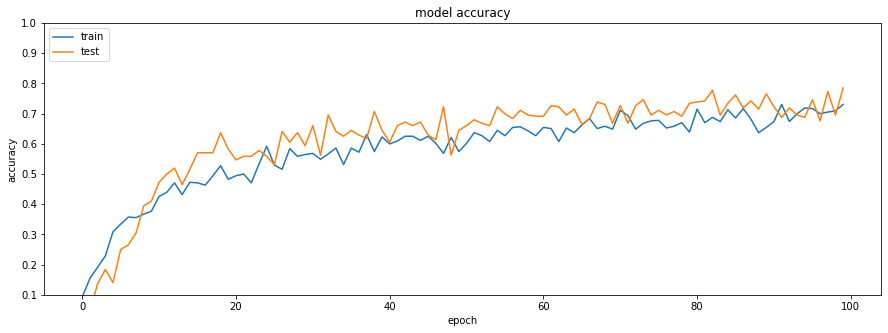

In [11]:
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.1,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
names = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '6', '7', '8', '9']

y_preds = []
y_real = []
counter=1
fig = plt.figure(figsize=(100,100))
for filename in glob.glob('data/test/1/*.jpg'):
    #im = Image.open(filename)
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)
    y_real.append(5)
    img_batch = np.expand_dims(img_array, axis=0)
    arr = model.predict(img_batch)
    maxi = 0
    cur=-1
    for i in range (0,52):
        if(arr[0][i]>maxi):
            maxi = arr[0][i]
            cur=i
    y_preds.append(cur)
    print(names[cur]+' '+str(maxi))
    if(names[cur]!='1'):
        fig.add_subplot(30,1,counter)
        counter=counter+1
        plt.imshow(img)
        plt.title(names[cur]+str(maxi))

print(counter-1)

0


<Figure size 7200x7200 with 0 Axes>

In [28]:
preds = model.predict(test_it)

43/43 [==============================] - 52s 1s/step


In [29]:
preds

array([[7.0984152e-06, 9.9622911e-01, 7.1445096e-04, ..., 1.6561197e-07,
        4.4967391e-04, 2.7642219e-04],
       [6.6942460e-09, 1.3349000e-08, 3.5418605e-08, ..., 6.4115939e-09,
        4.9733963e-08, 6.2184832e-08],
       [3.5748897e-08, 6.2122893e-08, 4.4373607e-08, ..., 1.0616774e-07,
        2.6539115e-07, 1.6848644e-07],
       ...,
       [2.6577485e-10, 7.9881822e-08, 1.3779089e-07, ..., 1.6369660e-07,
        1.5065041e-09, 1.1266641e-08],
       [5.1006849e-04, 2.5029090e-04, 6.6800055e-04, ..., 5.2419037e-04,
        4.2380032e-04, 7.1861837e-03],
       [1.6798085e-08, 4.4049531e-07, 3.3463886e-07, ..., 2.4900211e-09,
        1.0859678e-07, 1.5552915e-08]], dtype=float32)

In [17]:
test_fin_datagen = ImageDataGenerator(
)
test_it_fin = test_fin_datagen.flow_from_directory('Splitted_Dataset_3/test',shuffle=False, class_mode='categorical',target_size=(224, 224),batch_size=1)
y_preds = model.predict(test_it_fin)

Found 1358 images belonging to 52 classes.
1358/1358 [==============================] - 110s 81ms/step


In [18]:
y_real = test_it_fin.classes
y_real

array([ 0,  0,  0, ..., 51, 51, 51])

In [19]:
y_preds = np.argmax(y_preds,axis=1)

In [20]:
y_preds

array([ 0,  0,  0, ..., 51, 51, 13], dtype=int64)

NameError: name 'confusion_matrix' is not defined